<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_path = 'sat_scores.csv'

In [3]:
sat_dict = {}
state_list=[]
rate_list=[]
verbal_list=[]
math_list=[]
with open(sat_path, 'rb') as sat_comma:
    sat_reader = csv.reader(sat_comma, delimiter=',')
    for row in sat_reader:
        state_list.append(row[0])
        rate_list.append(row[1])
        verbal_list.append(row[2])
        math_list.append(row[3])
        
sat_dict[state_list[0]] = state_list[1:]
sat_dict[rate_list[0]] = rate_list[1:]
sat_dict[verbal_list[0]] = verbal_list[1:]
sat_dict[math_list[0]] = math_list[1:]
len(sat_dict)

4

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat_pandas = pd.DataFrame(sat_dict)
sat_pandas.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [5]:
sat = pd.read_csv(sat_path)
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [8]:
# For slideshow presentation
# Find placement of GA for all three categories.
print sat[sat.State == 'GA'].index
print sat[sat.sort_values('Verbal').reset_index(drop=True).State == 'GA'].index
sat.sort_values('Math').reset_index(drop=True).head()

Int64Index([13], dtype='int64')
Int64Index([3], dtype='int64')


,State,Rate,Verbal,Math
0,OH,26,534,439
1,DC,56,482,474
2,SC,57,486,488
3,GA,63,491,489
4,TX,53,493,499


In [9]:
# Find states with rate higher than or equal to GA's rate
sat[sat.Rate >=63]

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
sat.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [11]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [12]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [13]:
sat.shape

(52, 4)

In [14]:
sat_description = {'Column names': sat.columns, 'Data types': sat.dtypes, 'Info':sat.info(), 'Shape':sat.shape}
pprint(sat_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
{'Column names': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object'),
 'Data types': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object,
 'Info': None,
 'Shape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

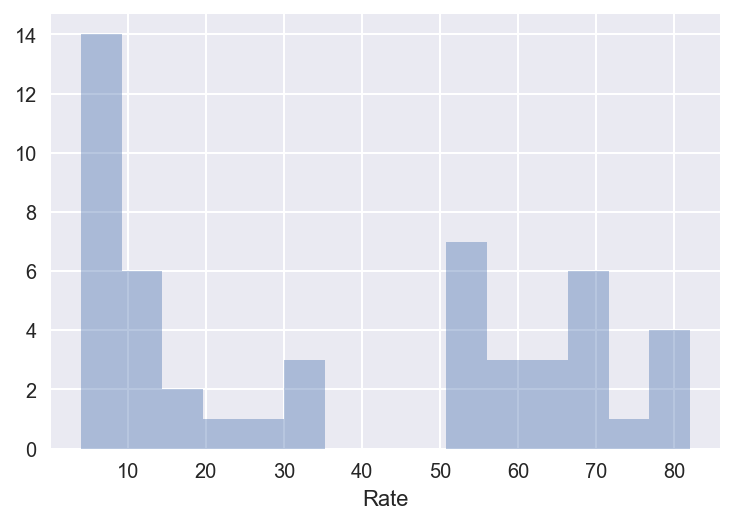

In [15]:
# EDA without SAT row all
sat_with_all = sat.copy()
sat = sat.iloc[:-1,:]
sns.distplot(sat['Rate'], kde=False, bins=15)

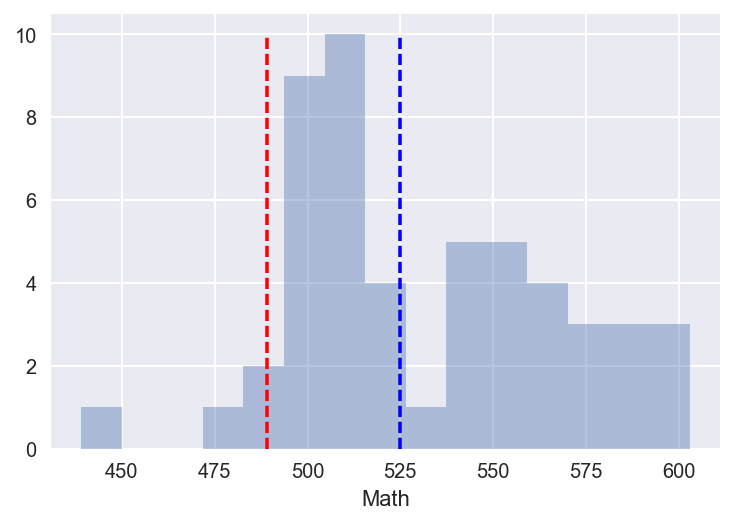

In [16]:
fig = plt.figure()
ax = fig.gca()
sns.distplot(sat['Math'], kde=False, bins=15)

ax.vlines(489,0,10, color='r', linestyle='--')
ax.vlines(sat.Math.median(),0,10, color='blue', linestyle='--')

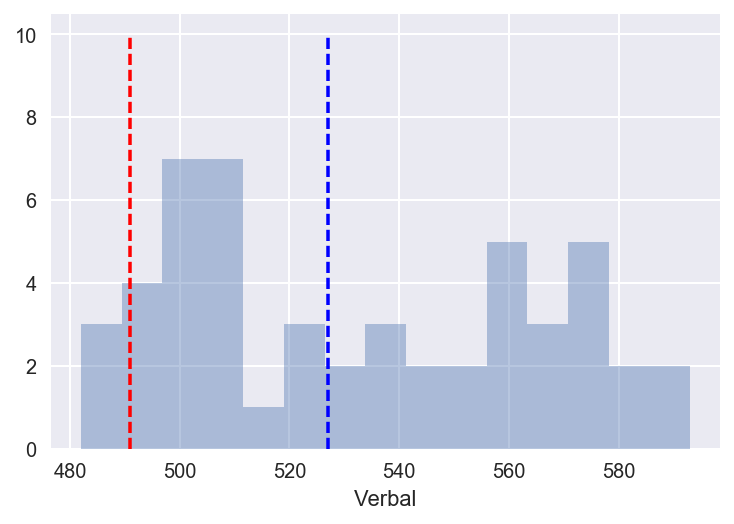

In [17]:
fig = plt.figure()
ax = fig.gca()
sns.distplot(sat['Verbal'], kde=False, bins=15)
ax.vlines(491,0,10, color='r', linestyle='--')
ax.vlines(sat.Verbal.median(),0,10, color='blue', linestyle='--')

In [18]:
sat2 = sat.copy()
sat2['average'] = (sat.Math + sat.Verbal)/2
best = sat2.sort_values('average',ascending=False).head(10)
best_ga = pd.concat([best, sat[sat.State=='GA']])

# sns.pairplot(best_ga[['Rate', 'Verbal', 'Math', 'State']], hue='State')
best_ga

,Math,Rate,State,Verbal,average
47,603,5,IA,593,598.0
49,599,4,ND,592,595.5
44,596,6,WI,584,590.0
37,589,9,MN,580,584.5
33,589,12,IL,576,582.5
48,582,4,SD,577,579.5
38,580,9,KS,577,578.5
42,577,8,MO,577,577.0
46,570,5,UT,575,572.5
36,572,11,MI,561,566.5


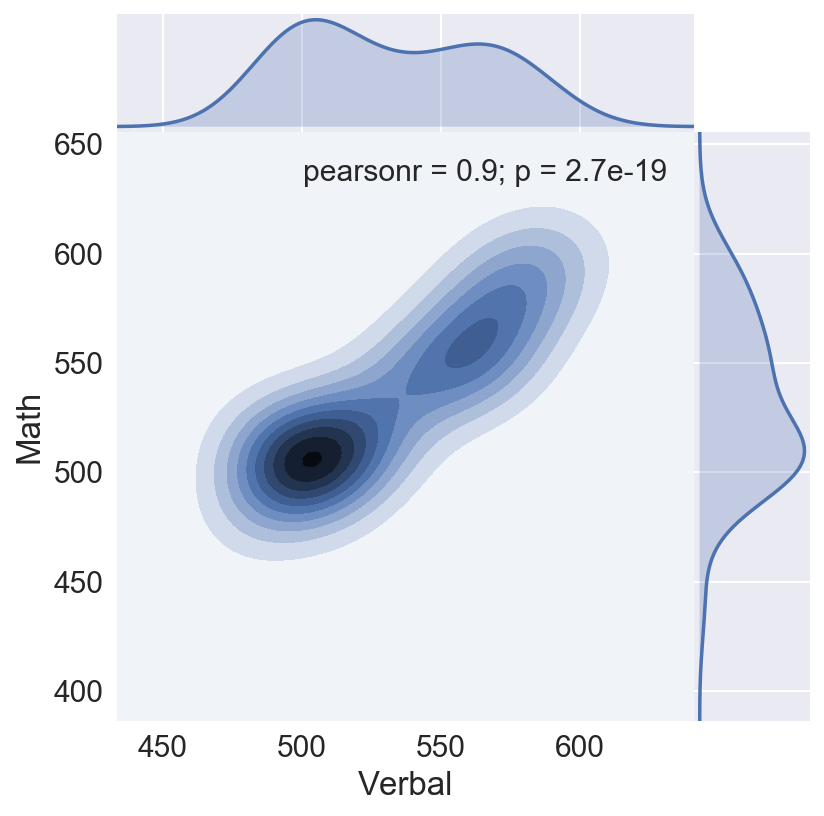

In [19]:
from scipy.stats import kendalltau
sns.set(font_scale=1.5, palette='deep')
sns.jointplot('Verbal', 'Math', sat, kind='kde', space=0)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

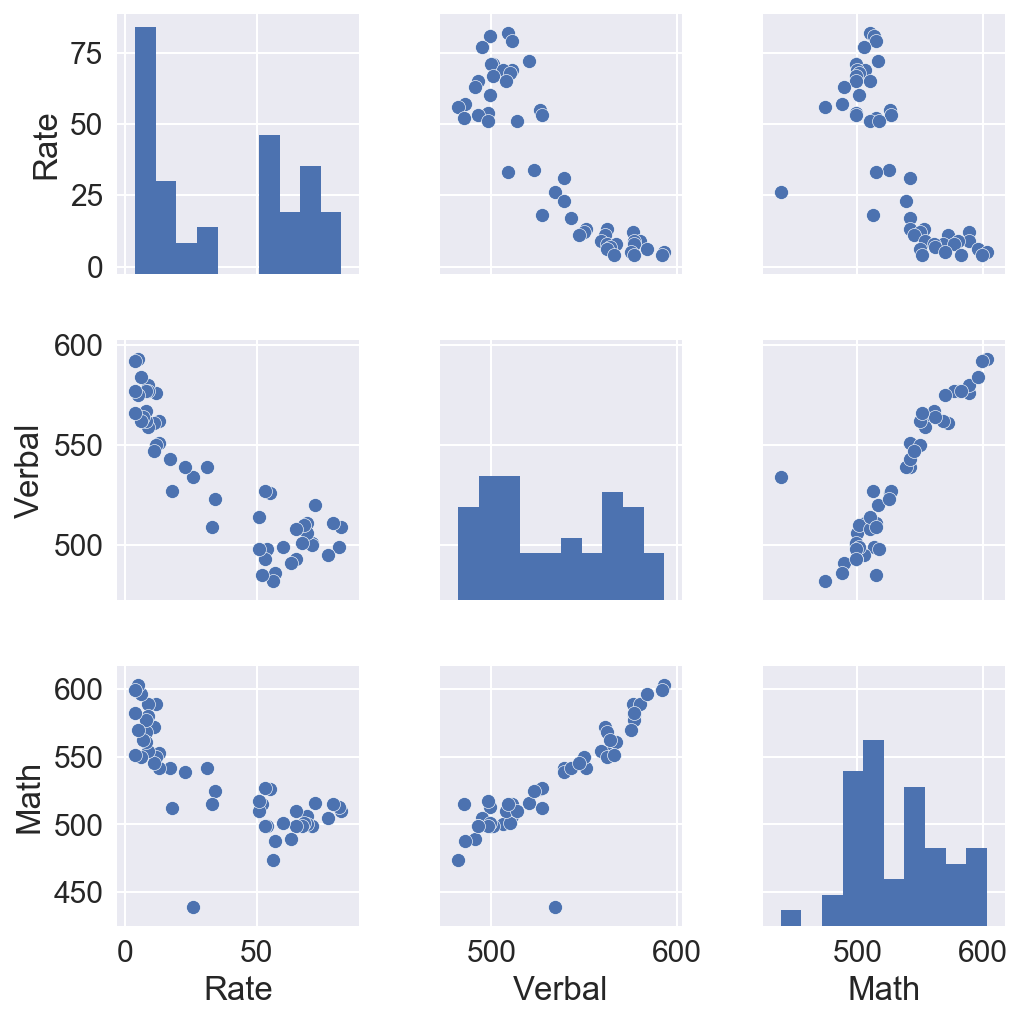

In [20]:
sns.pairplot(sat)
# The higher the rate of students taking the SAT, the lower the average score will be for verbal or math
# Math and verbal scores seem to be correlated, more educated in verbal = more educated in math

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

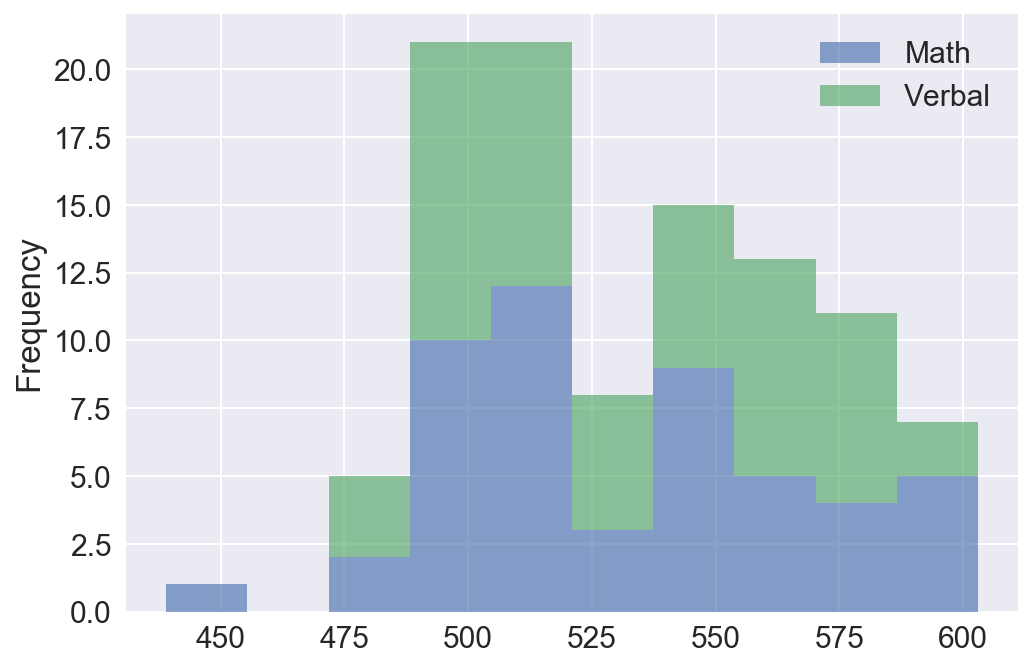

In [21]:
sat[['Math', 'Verbal']].plot.hist(stacked=True, alpha=0.65)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

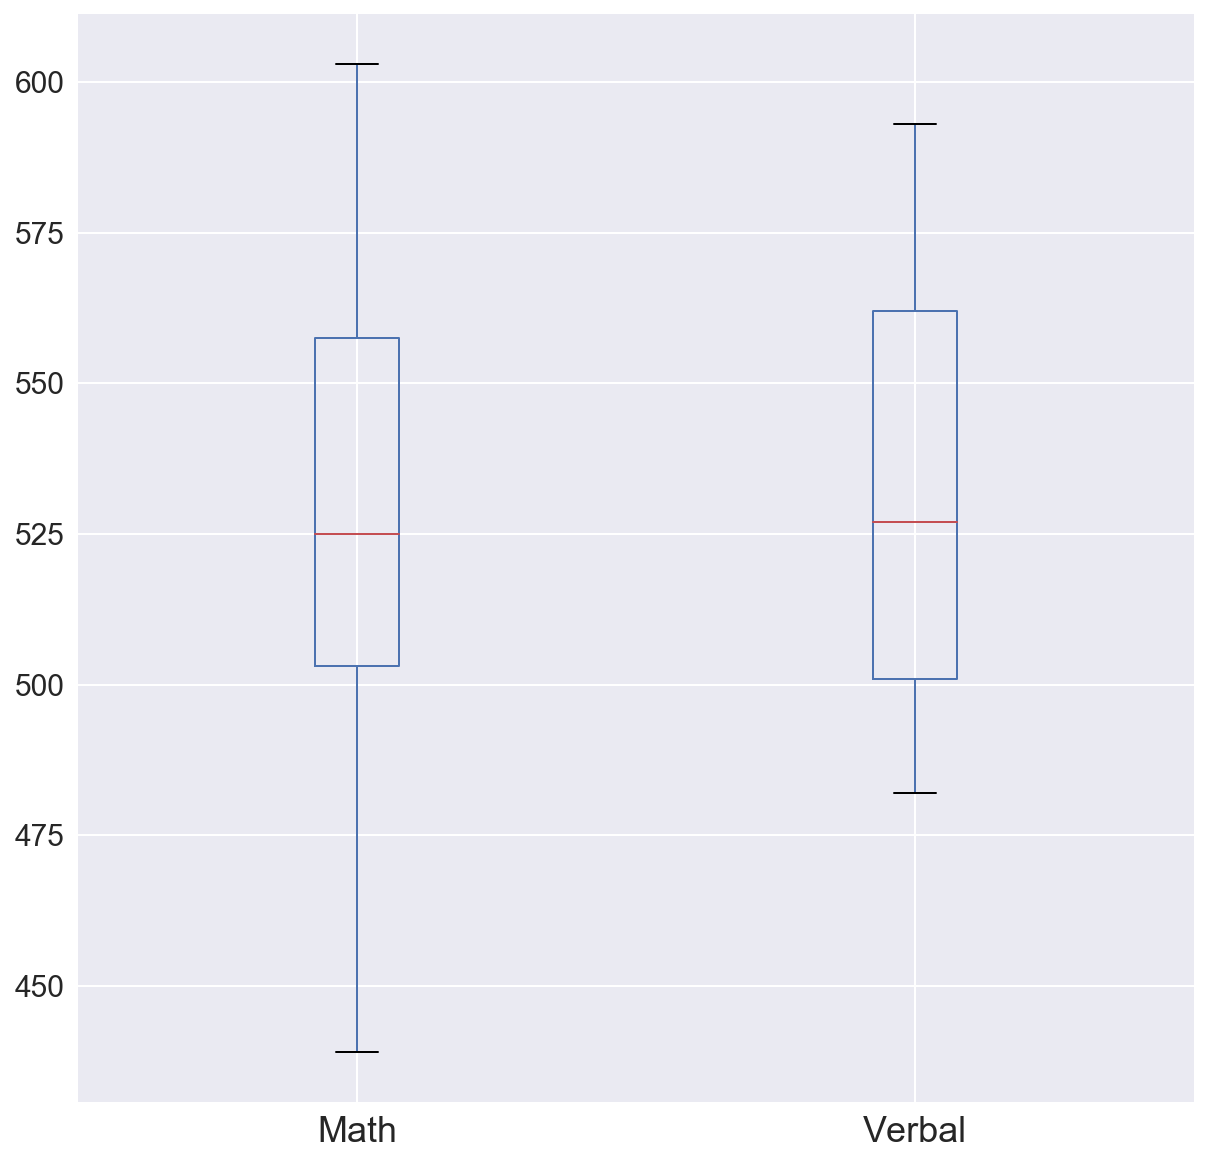

In [22]:
plt.figure(figsize=(10,10))
sat[['Math', 'Verbal']].boxplot()
# Benefits of using boxplot is you can see the IQR, outliers (if any), range, median more easily.
# Rate is on a different scale than math and verbal

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [23]:
# create a copy so that next steps that make new columns aren't carried over in next exercises
subset = sat[['Rate', 'Verbal', 'Math']]

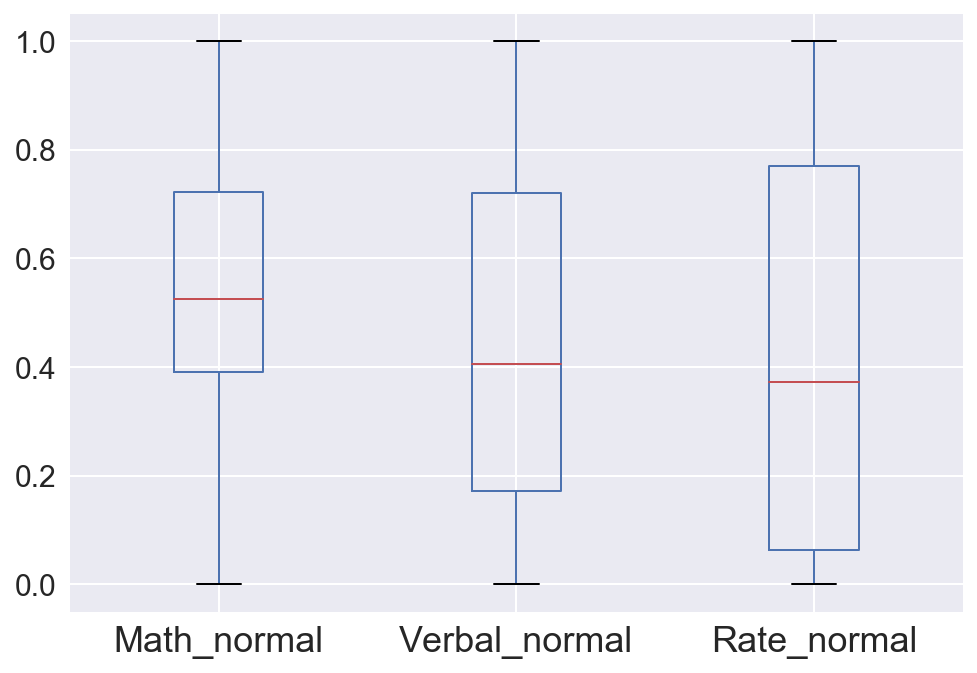

In [24]:
subset['Rate_normal'] = subset.Rate.apply(lambda x: float(x - subset.Rate.min())/np.ptp(subset.Rate))
subset['Math_normal'] = subset['Math'].apply(lambda x: float(x - subset.Math.min())/np.ptp(subset.Math))
subset['Verbal_normal'] = subset['Verbal'].apply(lambda x: float(x - subset.Verbal.min())/np.ptp(subset.Verbal))
subset[['Math_normal', 'Verbal_normal', 'Rate_normal']].boxplot()

# Normalize all values based on their range. So the entire range is from 0 to 1. So although rate is on a different
# scale, the spread of the its data vs the range of scores for Math can be compared.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [25]:
print 'SAT Verbal score mean is', sat.Verbal.mean()
verb_mask = sat.Verbal > sat.Verbal.mean()
sat.loc[verb_mask, :]
print sat.loc[verb_mask, :].count()
print sat.loc[verb_mask, :].State.values

# 24. That means the distribution is evenly distributed. Not necessarily normal because it can be multi-modal

SAT Verbal score mean is 532.529411765
State     24
Rate      24
Verbal    24
Math      24
dtype: int64
['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK'
 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [26]:
print 'SAT Verbal score median is', sat.Verbal.median()
verb_mask2 = sat.Verbal > sat.Verbal.median()
sat.loc[verb_mask2, :]
print sat.loc[verb_mask2, :].count()
print sat.loc[verb_mask2, :].State.values

# 24. It is the same as the one above. There are 50 states. The median is the middle number of the data, it makes sense
# to have half-1 values greater than the median.

SAT Verbal score median is 527.0
State     24
Rate      24
Verbal    24
Math      24
dtype: int64
['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK'
 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [27]:
sat['Verbal - Math'] = sat.Verbal - sat.Math
sat.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [28]:
verb_g_math = sat.sort_values(by='Verbal - Math', ascending=False).head(10)
verb_g_math.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [29]:
math_g_verb = sat.sort_values(by='Verbal - Math').head(10)
math_g_verb.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


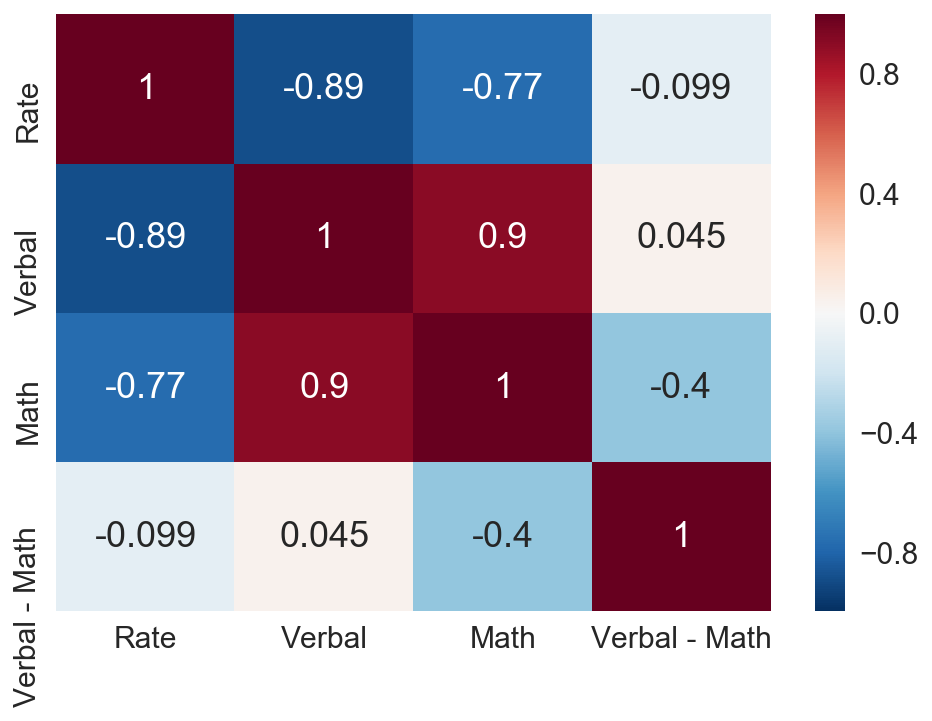

In [30]:
corr = sat.corr()
sns.heatmap(corr, annot=True)

# That math and verbal is highly positively related, and that verbal and math are negatively correlated to the rate.
# Meaning that if more students take the SAT, the verbal and math score of that state will trend negatively.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
sat.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [32]:
np.cov(sat[['Math','Verbal','Rate', 'Verbal - Math']])

array([[  74468.66666667,   75184.        ,   75485.33333333, ...,
          90798.66666667,   93484.33333333,   85672.33333333],
       [  75184.        ,   75955.58333333,   76214.75      , ...,
          91504.16666667,   94218.        ,   86258.33333333],
       [  75485.33333333,   76214.75      ,   76517.58333333, ...,
          92057.83333333,   94781.33333333,   86854.33333333],
       ..., 
       [  90798.66666667,   91504.16666667,   92057.83333333, ...,
         112151.        ,  115442.33333333,  106111.        ],
       [  93484.33333333,   94218.        ,   94781.33333333, ...,
         115442.33333333,  118831.33333333,  109213.33333333],
       [  85672.33333333,   86258.33333333,   86854.33333333, ...,
         106111.        ,  109213.33333333,  100524.66666667]])

In [33]:
# Covariance is different from correlation because



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
drugs = pd.read_csv('drug-use-by-age.csv')

In [35]:
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [36]:
# use = % of age group that used in last 12 months
# freq = Median number of times a user in an age group used in the past 12 months
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [37]:
# replace - with 0 for values in columns
drugs.replace(to_replace='-', value=0, inplace=True);

# Getting rid of age ranges
drugs.age = drugs.age.map(lambda x: x.split('-')[0])
drugs.age = drugs.age.map(lambda x: x.split('+')[0])

In [38]:
def floater(entry):
    '''Change digits to floats if possible, keep non-digits as strings'''
    try:
        return float(entry)
    except:
        return entry
    
drugs = drugs.applymap(floater)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

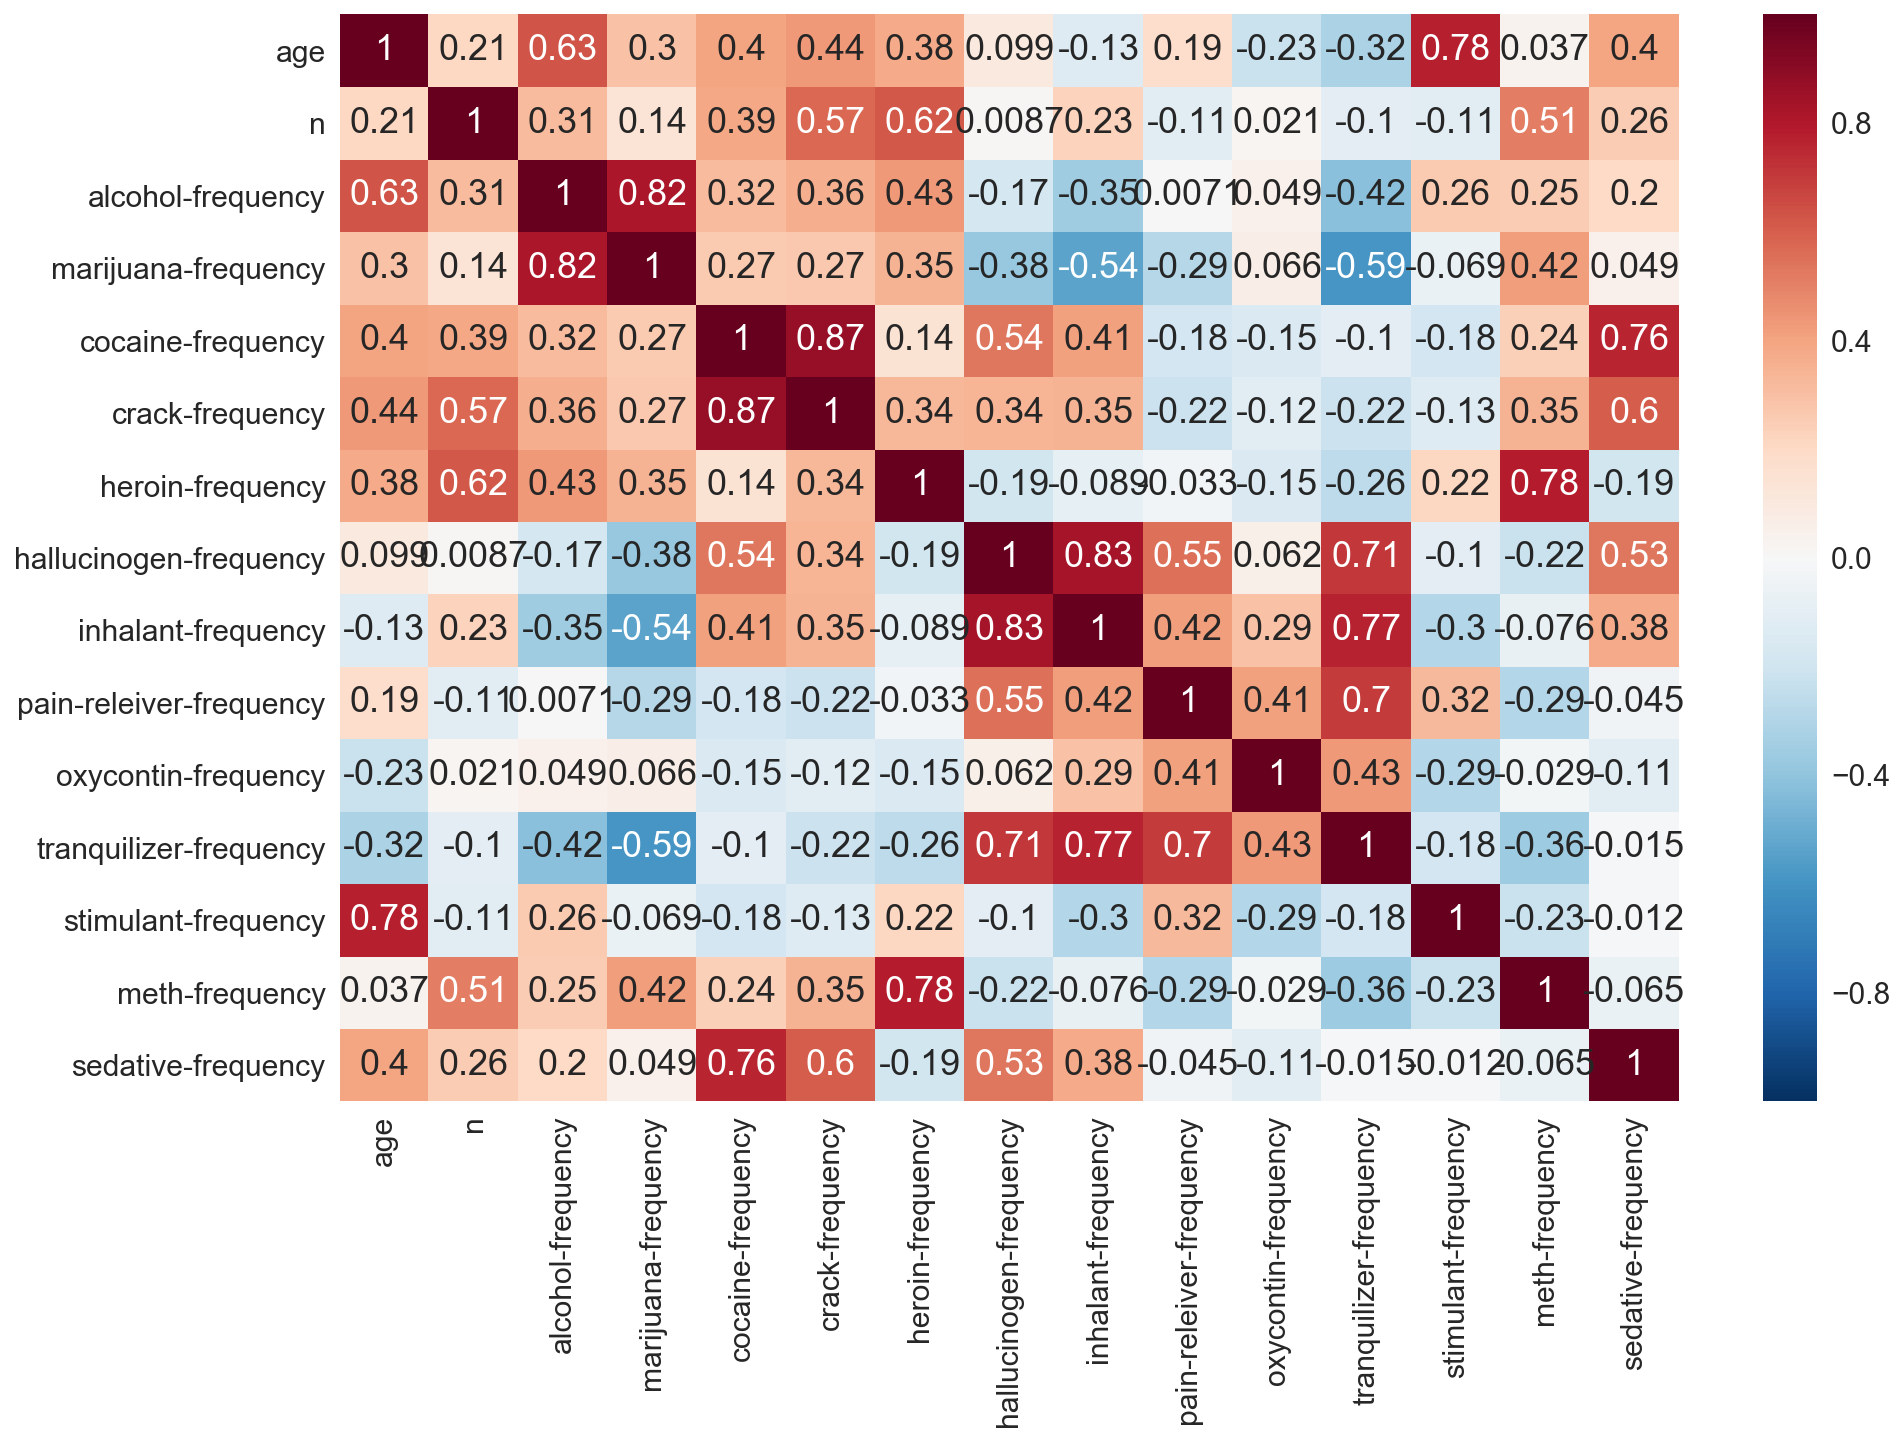

In [39]:
# two subsets for use and frequency
col_use = np.concatenate((drugs.columns[[0,1]], drugs.columns[2:drugs.shape[1]:2]))
drugs_use = drugs.loc[:,col_use]

col_freq = np.concatenate(([drugs.columns[0]], drugs.columns[1:drugs.shape[1]:2]))
drugs_freq = drugs.loc[:,col_freq]

use_corr = drugs_use.corr()
freq_corr = drugs_freq.corr()

# just graphing median # of times used (frequency) in the past year
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(freq_corr, annot=True, ax=ax)

In [40]:
drugs.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,24.529412,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,14.058439,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,26.000000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [41]:
# Choose groups to study
drug_sub = drugs_use[(drugs_use.age >= 18) & (drugs_use.age <= 25)]

# Apply averages for all median drug frequency
drug_sub['average'] = drug_sub.loc[:, 'alcohol-use':].apply(np.mean, axis=1)

# Reset the index
drug_sub.reset_index(drop=True, inplace=True)
drug_sub

C:\Users\Chris\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,average
0,18.0,2469.0,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,9.607692
1,19.0,2223.0,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,10.169231
2,20.0,2271.0,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,10.884615
3,21.0,2354.0,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,11.461538
4,22.0,4707.0,84.2,28.4,4.5,0.5,1.1,5.2,1.0,10.0,1.7,4.4,3.6,0.6,0.2,11.184615
5,24.0,4591.0,83.1,24.9,4.0,0.5,0.7,4.5,0.8,9.0,1.3,4.3,2.6,0.7,0.2,10.507692


** Question and deliverables**

Hypotheses:
- H0 - Higher drug use proportion is independent on being in age bracket 18-20 or 21-25.
- HA - Higher drug use proportion is dependent on being in either age bracket 18-20 or 21-25.

Deliverables: chi-squared statistic and p-value

In [42]:
# Code

# Make a chi-square table with actual number of people, not proportion
# of columns in interest
combine_drug = drug_sub.loc[:, ['marijuana-use', 'cocaine-use', 'hallucinogen-use', 
                                'pain-releiver-use', 'tranquilizer-use', 
                                'stimulant-use']].apply(lambda x: x*drug_sub.n/100)
# make two separate dataframes based on age
drug1820 = pd.DataFrame(combine_drug.ix[0:3, :].sum(), columns=['18 - 20 year olds'])
drug2125 = pd.DataFrame(combine_drug.ix[3:,:].sum(), columns=['21 - 25 year olds'])
# make a combined table and add 'Total' column and row
chi_drug = pd.concat([drug1820, drug2125], axis=1)
chi_drug['Total'] = chi_drug.iloc[:,0] + chi_drug.iloc[:,1]
chi_drug.loc['Total'] =[chi_drug.iloc[:,0].sum(), chi_drug.iloc[:,1].sum(), chi_drug.iloc[:,2].sum()]

# Get chi2 and p_value
results = stats.chi2_contingency(np.array(chi_drug))
chi2 = results[0]
p_value = results[1]
print chi2, p_value

chi_drug

34.5519816336 0.000551728439747


,18 - 20 year olds,21 - 25 year olds,Total
marijuana-use,3123.495,3256.767,6380.262
cocaine-use,394.422,508.447,902.869
hallucinogen-use,680.364,599.661,1280.025
pain-releiver-use,875.070,1095.750,1970.820
tranquilizer-use,428.787,496.327,925.114
stimulant-use,334.783,385.332,720.115
Total,5836.921,6342.284,12179.205


In [43]:
# Finding the rates

rate_1820 = float(chi_drug.iloc[-1,0]/chi_drug.iloc[-1,-1])
rate_2125 = float(chi_drug.iloc[-1,1]/chi_drug.iloc[-1,-1])
print('18 - 20 y/o rate: %.2f \n21 - 25 y/o rate: %.2f' % (rate_1820, rate_2125))
rate_diff = (rate_2125/rate_1820 - 1)*100
print('21 - 25 year olds have a %.2f higher rate of drug use than 18 - 20 year olds' % (rate_diff))

18 - 20 y/o rate: 0.48 
21 - 25 y/o rate: 0.52
21 - 25 year olds have a 8.66 higher rate of drug use than 18 - 20 year olds


**Report**


With a p_value << 0.05, one can reject the null hypothesis that higher drug use proportion is not related to being in age bracket 18-20 or age bracket 21-25, leading to an accepted alternative hypothesis. The alternative is that being in a certain age bracket does influence drug use proportion for the sample set.

Finding the rate of both brackets reveals taht 21-25 year olds use drugs at an 8.66 higher rate than 18 - 20 year olds.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [44]:
sat.Rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

In [45]:
# Outlier defined by more than 1.5 IQR above the 3rd quartile range or below the 1st quartile range
per_25 = sat.Rate.describe()[4]
per_75 = sat.Rate.describe()[6]
IQR = per_75 - per_25
outlier_above = 1.5*IQR + per_75
outlier_below = per_25 - 1.5*IQR
print outlier_above, 'to', outlier_below

146.5 to -73.5


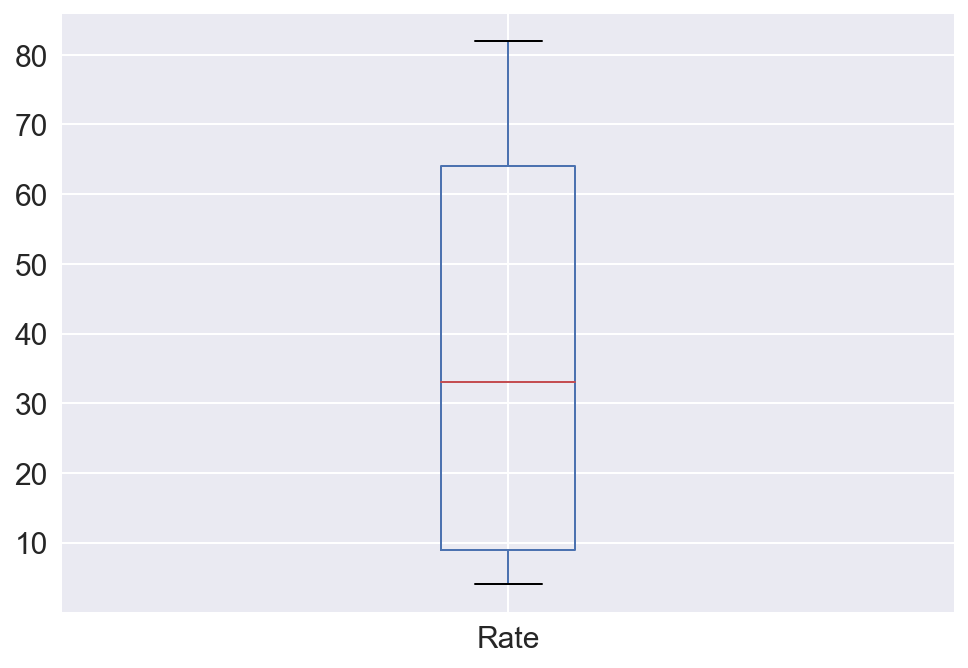

In [46]:
sat.Rate.plot(kind='box')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [47]:
stats.spearmanr(sat.Verbal, sat.Math)

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.